In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skl
import seaborn as sns
import math

In [2]:
def perceptron(cls1_data, cls2_data):
    # returns a d+1 dimension weight vector
    # class1 ==> 1 (+ve class); class2 ==> 0 (-ve class)
    w = np.zeros(3)
    prev_err = float('inf')
    epoch = 1
    avg_error_list = []
    thresh = 10 ** (-5)
    while True:
        err = 0
        for index, train_sample in cls1_data.iterrows():
            xn_hat = np.insert(np.array(train_sample), 0, 1)
            an = np.dot(w.T, xn_hat)
            sn = logistic_fn(an)
            
            err += ((1 - sn) ** 2)/2
            
            rate_parameter = 1 / epoch
            
            dw = (rate_parameter * (1 - sn) * sn * (1 - sn)) * xn_hat
            w += dw
            
        for index, train_sample in cls2_data.iterrows():
            xn_hat = np.insert(np.array(train_sample), 0, 1)
            an = np.dot(w.T, xn_hat)
            sn = logistic_fn(an)
            
            err += ((0 - sn) ** 2)/2
            
            rate_parameter = 1 / epoch
            
            dw = (rate_parameter * (0 - sn) * sn * (1 - sn)) * xn_hat
            w += dw
        
        avg_err = err / (len(cls1_data) + len(cls2_data))
        avg_error_list.append(avg_err)
        
        if abs(prev_err - avg_err) < thresh or epoch > 20: break
        
        prev_err = avg_err
        epoch += 1
        
    # plot epoch vs avg error
#     sns.barplot(x = 'epoch', y = 'average error', data = pd.DataFrame({'epoch': np.arange(1, len(avg_error_list)+1), 'average error': avg_error_list}))
    plt.bar(x = np.arange(1, len(avg_error_list)+1), height = avg_error_list)
    plt.xlabel('epoch')
    plt.ylabel('average error')    
    return w

def logistic_fn(x):
    return 1/(1 + (math.e ** (-x)))

def predict(test_sample, w_12, w_23, w_31):
    x = np.insert(np.array(test_sample), 0, 1)
    res12, res23, res31 = logistic_fn(np.dot(w_12.T, x)) > 0.5, logistic_fn(np.dot(w_23.T, x)) > 0.5, logistic_fn(np.dot(w_31.T, x)) > 0.5
    cls1_votes = res12 + (1 - res31)
    cls2_votes = res23 + (1 - res12)
    cls3_votes = res31 + (1 - res23)
    mx = max(cls1_votes, cls2_votes, cls3_votes)
    if(mx == cls1_votes): return 1
    if(mx == cls2_votes): return 2
    if(mx == cls3_votes): return 3
    
def predict2(test_sample, w):
    x = np.insert(np.array(test_sample), 0, 1)
    out = logistic_fn(np.dot(w.T, x))
    return 1 if out > 0.5 else 2

In [3]:
# read the text file
all_data = pd.read_csv("NLS_Group18.txt", header = None, names = ["x", "y"], skiprows = 1, sep = ' ')
index = all_data.reset_index(inplace = True)
all_data.columns = ['x', 'y', 'non']
all_data.drop('non', axis = 1, inplace = True)
all_data_x = all_data['y'].copy()
all_data['y'] = all_data['x']
all_data['x'] = all_data_x

In [4]:
cls1_data, cls2_data, cls3_data = all_data.iloc[:500], all_data.iloc[500:1000], all_data.iloc[1000:1500]
cls1_data_train, cls1_data_test = skl.train_test_split(cls1_data, test_size = 0.3, train_size = 0.7)
cls2_data_train, cls2_data_test = skl.train_test_split(cls2_data, test_size = 0.3, train_size = 0.7)
cls3_data_train, cls3_data_test = skl.train_test_split(cls3_data, test_size = 0.3, train_size = 0.7)

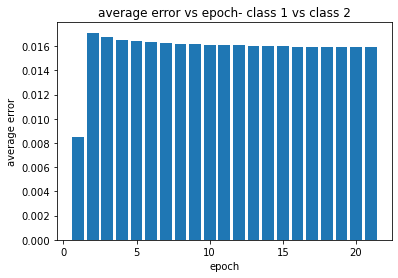

In [5]:
w_12 = perceptron(cls1_data_train, cls2_data_train)
plt.title('average error vs epoch- class 1 vs class 2')
plt.show()

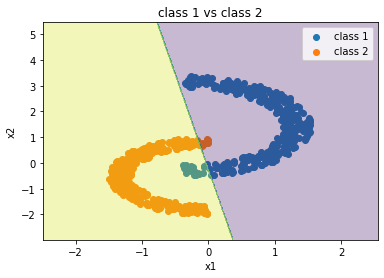

In [6]:
fig, axes = plt.subplots()
axes.scatter(cls1_data_train['x'], cls1_data_train['y'], label = 'class 1')
axes.scatter(cls2_data_train['x'], cls2_data_train['y'], label = 'class 2')

x_min, x_max = all_data.iloc[:, 0].min() - 1, all_data.iloc[:, 0].max() + 1
y_min, y_max = all_data.iloc[:, 1].min() - 1, all_data.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Make predictions on the mesh grid using the trained perceptron model
Z = np.array([predict2(x, w_12) for x in np.c_[xx.ravel(), yy.ravel()]])

# Reshape the predictions into a 2D array
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3)

plt.title('class 1 vs class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.show()

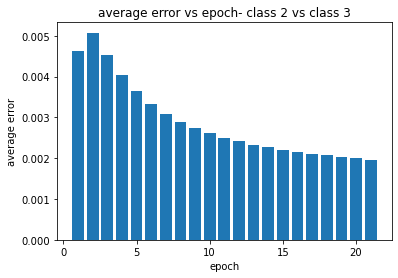

In [7]:
w_23 = perceptron(cls2_data_train, cls3_data_train)
plt.title('average error vs epoch- class 2 vs class 3')
plt.show()

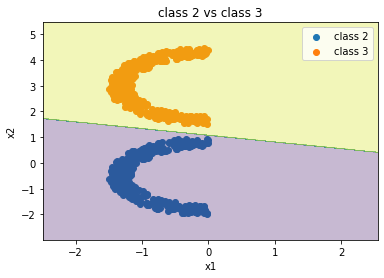

In [8]:
fig, axes = plt.subplots()
axes.scatter(cls2_data_train['x'], cls2_data_train['y'], label = 'class 2')
axes.scatter(cls3_data_train['x'], cls3_data_train['y'], label = 'class 3')

x_min, x_max = all_data.iloc[:, 0].min() - 1, all_data.iloc[:, 0].max() + 1
y_min, y_max = all_data.iloc[:, 1].min() - 1, all_data.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Make predictions on the mesh grid using the trained perceptron model
Z = np.array([predict2(x, w_23) for x in np.c_[xx.ravel(), yy.ravel()]])

# Reshape the predictions into a 2D array
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3)
plt.title('class 2 vs class 3')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

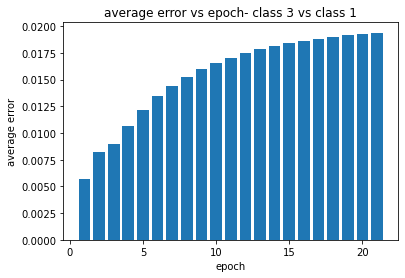

In [9]:
w_31 = perceptron(cls3_data_train, cls1_data_train)
plt.title('average error vs epoch- class 3 vs class 1')
plt.show()

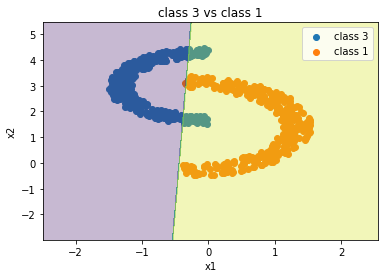

In [10]:
fig, axes = plt.subplots()
axes.scatter(cls3_data_train['x'], cls3_data_train['y'], label = 'class 3')
axes.scatter(cls1_data_train['x'], cls1_data_train['y'], label = 'class 1')

x_min, x_max = all_data.iloc[:, 0].min() - 1, all_data.iloc[:, 0].max() + 1
y_min, y_max = all_data.iloc[:, 1].min() - 1, all_data.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Make predictions on the mesh grid using the trained perceptron model
Z = np.array([predict2(x, w_31) for x in np.c_[xx.ravel(), yy.ravel()]])

# Reshape the predictions into a 2D array
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3)
plt.title('class 3 vs class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

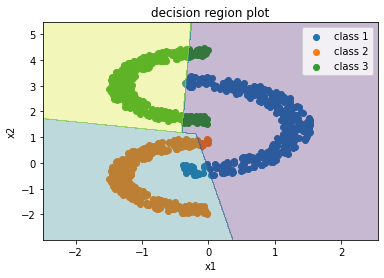

In [11]:
fig, axes = plt.subplots()
axes.scatter(cls1_data_train['x'], cls1_data_train['y'], label = 'class 1')
axes.scatter(cls2_data_train['x'], cls2_data_train['y'], label = 'class 2')
axes.scatter(cls3_data_train['x'], cls3_data_train['y'], label = 'class 3')

x_min, x_max = all_data.iloc[:, 0].min() - 1, all_data.iloc[:, 0].max() + 1
y_min, y_max = all_data.iloc[:, 1].min() - 1, all_data.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Make predictions on the mesh grid using the trained perceptron model
Z = np.array([predict(x, w_12, w_23, w_31) for x in np.c_[xx.ravel(), yy.ravel()]])

# Reshape the predictions into a 2D array
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3)
plt.title('decision region plot')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [12]:
y_actu = pd.Series([(x // 150) + 1 for x in range(450)], name='Actual')
y_pred = pd.Series([predict(test_sample, w_12, w_23, w_31) for index, test_sample in pd.concat([cls1_data_test, cls2_data_test, cls3_data_test]).iterrows()], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(f"Confusion matrix: \n\n{df_confusion}")
acc = sum(np.diag(df_confusion)) / 450 * 100
print(f"\n\nclassification accuracy: {round(acc, 2)}%")

Confusion matrix: 

Predicted    1    2    3
Actual                  
1          138    9    3
2            6  144    0
3           29    0  121


classification accuracy: 89.56%
